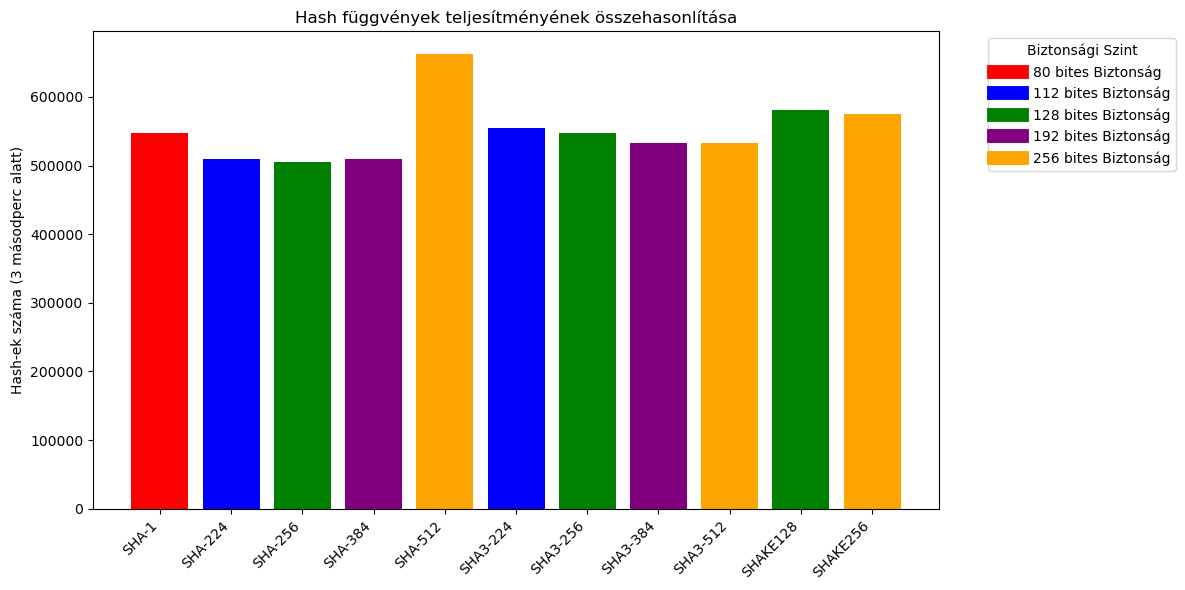

In [3]:
#!pip install pycryptodome matplotlib

from Crypto.Hash import SHA1, SHA224, SHA256, SHA384, SHA512, SHA3_224, SHA3_256, SHA3_384, SHA3_512, SHAKE128, SHAKE256
import time
import matplotlib.pyplot as plt

# Hash függvények biztonsági szintjük (bitben)
hash_functions = {
    "SHA-1": (SHA1, 80),
    "SHA-224": (SHA224, 112),
    "SHA-256": (SHA256, 128),
    "SHA-384": (SHA384, 192),
    "SHA-512": (SHA512, 256),
    "SHA3-224": (SHA3_224, 112),
    "SHA3-256": (SHA3_256, 128),
    "SHA3-384": (SHA3_384, 192),
    "SHA3-512": (SHA3_512, 256),
    "SHAKE128": (SHAKE128, 128),
    "SHAKE256": (SHAKE256, 256),
}

# Színek hozzárendelése az ütközési biztonsági szinthez
color_mapping = {
    80: "red",
    112: "blue",
    128: "green",
    192: "purple",
    256: "orange",
}

# Üzenet, amelyet hashelni fogunk
message = b"Test message"

# Mérés időtartama (másodpercben)
duration = 3  # 3 másodperc

# Eredmények tárolása
hash_iterations = {}
hash_colors = {}

# Hash függvények teljesítményének mérése
for name, (func, collision_bits) in hash_functions.items():
    iterations = 0
    start_time = time.time()
    while time.time() - start_time < duration:
        if name in ["SHAKE128", "SHAKE256"]:
            h = func.new(message)
            digest = h.read(32)  # SHAKE funkcióhoz fix hosszúságú kimenet
        else:
            h = func.new(message)
            digest = h.digest()
        iterations += 1
    hash_iterations[name] = iterations
    hash_colors[name] = color_mapping[collision_bits]

# Eredmények ábrázolása
plt.figure(figsize=(12, 6))
bars = plt.bar(hash_iterations.keys(), hash_iterations.values(), color=[hash_colors[name] for name in hash_iterations.keys()])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Hash-ek száma (3 másodperc alatt)")
plt.title("Hash függvények teljesítményének összehasonlítása")

# Jelmagyarázat hozzáadása
legend_labels = {color: strength for strength, color in color_mapping.items()}
handles = [plt.Line2D([0], [0], color=color, lw=10, label=f"{strength} bites Biztonság") for color, strength in legend_labels.items()]
plt.legend(handles=handles, title="Biztonsági Szint", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
